In [ ]:
%pip install pandas


In [ ]:
%pip install  numpy matplotlib

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

#Define the file paths 
DATA_PATH = "C:\\Users\\nicko\\Downloads\\rees46_customer_model.csv\\rees46_customer_model.csv"
OUT_FIG = Path("../results/figures")
OUT_TAB = Path("../results/tables")

OUT_FIG.mkdir(parents=True, exist_ok=True)
OUT_TAB.mkdir(parents=True, exist_ok=True)


In [6]:
dictionary = pd.read_csv("C:\\Users\\nicko\\Downloads\\tmu-cind119-churn-rees46\\data\\rees46_data_dictionary.csv", encoding='latin-1')
dictionary

,Set,Attribute,Description,Variable name
0,Dependent,churn event,No transaction in future period.,target_event
1,Dependent,retention campaign profit,Incremental profit in future period.,target_actual_profit
2,Recency,session recency,time duration from the last session [days],session_recency
3,Recency,purchase recency,time duration from the last transaction [days],purchase_recency
4,Recency,time to session,time between sessions [days],inter_session_time
5,Recency,time to purchase,time between purchases [days],inter_purchase_time
6,Frequency,session number,user-session number [n],session_number
7,Frequency,purchase number,user-purchase number [n],purchase_number
8,Frequency,session daily frequency *,session count per day,session_count_ratio
9,Frequency,interaction daily frequency *,interaction count per day,click_count_ratio


In [7]:
df = pd.read_csv(DATA_PATH)
df.head()

,row_id,user_id,length_mean,start_year_mean,start_yearday_mean,start_month_mean,start_monthday_mean,start_week_mean,start_weekday_mean,start_isweekend_mean,...,purchase_latent_factor14,purchase_latent_factor15,purchase_latent_factor16,purchase_latent_factor17,target_event,target_revenue,target_customer_value,time_step,target_customer_value_lag1,target_actual_profit
0,31,522576412,10133.678750,2019.3250,241.65000,8.400000,16.875000,33.825000,4.225000,0.300000,...,0.633005,0.063525,0.000000,0.000000,0,3403.83,171.760358,0,90.148425,-13.279611
1,53,551695186,5.359195,2019.3620,222.05173,7.827586,14.655172,31.448277,4.034483,0.258621,...,0.395069,0.267275,0.000000,0.000000,1,0.00,387.102758,0,445.168171,3.592337
2,65,561472000,4.885714,2019.0000,297.54285,10.114285,21.000000,43.142857,2.942857,0.285714,...,0.000000,0.000000,0.000000,0.000000,1,0.00,347.097991,0,399.162689,3.216008
3,85,585643355,4175.082759,2019.8966,106.00000,3.931035,17.655172,15.896552,3.655172,0.206897,...,0.165644,0.000000,0.165603,0.263806,0,937.86,279.270244,0,321.607950,-13.185855
4,133,520792937,3.325601,2019.3196,212.86598,7.556701,13.711340,30.989690,3.958763,0.350515,...,0.000000,0.000000,0.048937,0.000000,1,0.00,91.360471,0,105.064542,0.732248


In [8]:
df.shape

(112610, 276)

# Build a custom data overview tool:
- Scan every column in my dataset and builds a DataFrame Summary describing each column's type, unique values, missing data and range(min-max)

In [9]:
# Drop unuseful columns :
df.drop('row_id',axis=1,inplace=True)

df.drop('user_id',axis=1,inplace=True)

In [10]:
def more_info(data):
  n_unique=[]
  uniques=[]
  data_type=[]
  missing_values=[]
  missing_percentage=[]
  columns=[]
  max_values=[]
  min_values=[]

  for col in data.columns:
    columns.append(col)
    n_unique.append(data[col].nunique())
    uniques.append(data[col].unique())
    data_type.append(data[col].dtype)
    missing_values.append(data[col].isnull().sum())
    missing_percentage.append((data[col].isnull().sum()/data.shape[0])*100)
    if data[col].dtype!='object':
      max_values.append(data[col].max())
      min_values.append(data[col].min())
    else:
      max_values.append(np.nan)
      min_values.append(np.nan)
  more_info_df = pd.DataFrame({'column': columns,
                                'n_unique': n_unique,
                                'uniques': uniques,
                                'data_type': data_type,
                                'missing_values': missing_values,
                                'missing_percentage': missing_percentage,
                               'max_values':max_values,
                               'min_values':min_values})
  return more_info_df

In [11]:
info=more_info(df)
info

,column,n_unique,uniques,data_type,missing_values,missing_percentage,max_values,min_values
0,length_mean,90714,"[10133.678749999995, 5.359195402298854, 4.8857...",float64,0,0.0,79235.610606,0.000000
1,start_year_mean,5536,"[2019.325, 2019.362, 2019.0, 2019.8966, 2019.3...",float64,0,0.0,2020.000000,2019.000000
2,start_yearday_mean,65728,"[241.65, 222.05173, 297.54285, 106.0, 212.8659...",float64,0,0.0,365.000000,1.000000
3,start_month_mean,24338,"[8.4, 7.827586, 10.114285, 3.9310346, 7.556701...",float64,0,0.0,12.000000,1.000000
4,start_monthday_mean,27835,"[16.875, 14.655172, 21.0, 17.655172, 13.71134,...",float64,0,0.0,31.000000,1.000000
...,...,...,...,...,...,...,...,...
269,target_revenue,68537,"[3403.8300000000004, 0.0, 937.86, 546.68, 7286...",float64,0,0.0,527776.780000,0.000000
270,target_customer_value,112592,"[171.76035756460058, 387.1027575458951, 347.09...",float64,0,0.0,40582.335231,-290.189572
271,time_step,7,"[0, 1, 2, 3, 4, 5, 6]",int64,0,0.0,6.000000,0.000000
272,target_customer_value_lag1,90988,"[90.1484250547176, 445.1681711777794, 399.1626...",float64,0,0.0,40582.335231,-290.189572


In [12]:
#check to see if there is any column with 1 unique value adn remove them
info[info['n_unique']==1]

,column,n_unique,uniques,data_type,missing_values,missing_percentage,max_values,min_values
87,session_number_min,1,[1],int64,0,0.0,1.0,1.0
90,purchase_number_min,1,[1],int64,0,0.0,1.0,1.0
102,haspurchase_max,1,[1],int64,0,0.0,1.0,1.0


In [13]:
#Drop those feature since it only add noises to the model
df.drop(columns=info[info['n_unique']==1]['column'],axis=1,inplace=True)

In [14]:
#check duplicates and missing values
df.duplicated().sum()
info[info['missing_values']>0]

#no duplicates and missing values found


,column,n_unique,uniques,data_type,missing_values,missing_percentage,max_values,min_values


In [15]:
#quickly identify non-numeric columns that may need encoding
non_numeric_cols = df.select_dtypes(include=['object']).columns

print("Non-numeric columns that may need encoding:")
print(non_numeric_cols)

Non-numeric columns that may need encoding:
Index([], dtype='object')


# CONDUCT A DATA ANALYSIS 

- The Goal is to move from exploring the data to analyzing relationships and building models 

### TOP CORRELATION WITH TARGET VARIABLE 


In [16]:
# Cell — Find top correlations with target_event

target = 'target_event'

# Select only numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Remove the target itself from the list
if target in num_cols:
    num_cols.remove(target)

# Compute Pearson correlation with the target
corr = df[num_cols].corrwith(df[target]).dropna()

# Sort by absolute correlation (strongest first)
corr_sorted = corr.abs().sort_values(ascending=False).to_frame('abs_corr')
corr_sorted['corr'] = corr[corr_sorted.index]
top_corr = corr_sorted.head(20)


top_corr


,abs_corr,corr
target_actual_profit,0.926032,0.926032
session_recency_min,0.534438,0.534438
purchase_recency_min,0.516597,0.516597
session_recency_mean,0.477474,0.477474
purchase_recency_mean,0.474895,0.474895
purchase_recency_max,0.367690,0.367690
session_recency_max,0.352294,0.352294
time_step,0.347981,-0.347981
purchase_recency_sum,0.343076,0.343076
session_recency_cv,0.330524,-0.330524


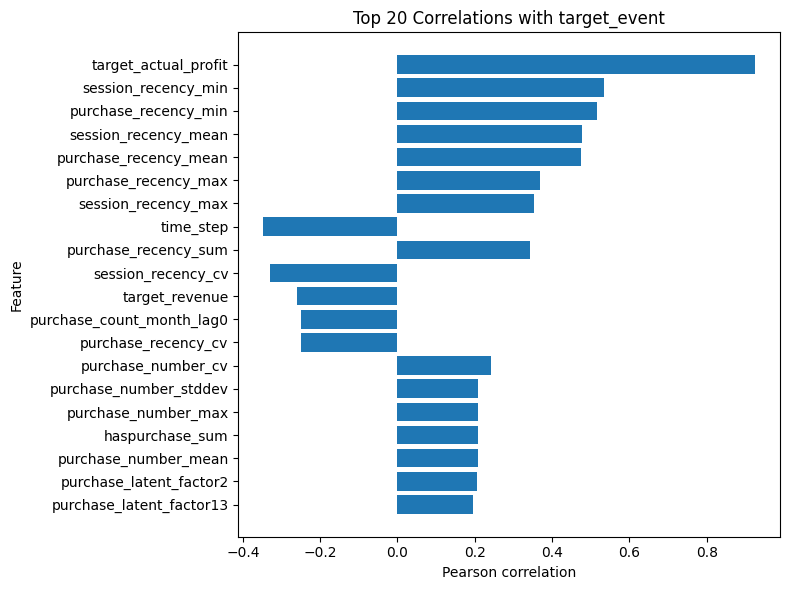

In [17]:
#  — Visualize top correlations with target_event

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.barh(top_corr.index, top_corr['corr'])
plt.title("Top 20 Correlations with target_event")
plt.xlabel("Pearson correlation")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # highest correlation on top
plt.tight_layout()

# Save figure for GitHub
plt.savefig("../results/figures/top_correlations_with_target.png", dpi=150)
plt.show()

Summary statistics of the most correlated features

In [18]:
# Cell — Summary stats for top correlated features with target_event

top_corr_features = [
    'target_actual_profit', 'session_recency_min', 'purchase_recency_min',
    'session_recency_mean', 'purchase_recency_mean', 'purchase_recency_max',
    'session_recency_max', 'time_step', 'purchase_recency_sum',
    'session_recency_cv', 'target_revenue', 'purchase_count_month_lag0',
    'purchase_recency_cv', 'purchase_number_cv', 'purchase_number_stddev',
    'purchase_number_max', 'haspurchase_sum', 'purchase_number_mean',
    'purchase_latent_factor2', 'purchase_latent_factor13'
]

# Filter only existing columns (some names might vary)
existing_cols = [col for col in top_corr_features if col in df.columns]

# Generate summary stats
summary_topcorr = df[existing_cols].describe().T
summary_topcorr = summary_topcorr[['count', 'mean', 'std', 'min', 'max']]
summary_topcorr = summary_topcorr.rename(columns={
    'count': 'Count',
    'mean': 'Mean',
    'std': 'Std Dev',
    'min': 'Min',
    'max': 'Max'
}).round(2)

# Format large numbers
summary_topcorr['Count'] = summary_topcorr['Count'].apply(lambda x: f"{int(x):,}")

# Save and display
summary_topcorr.to_csv("../results/tables/summary_top_correlated_features.csv")
summary_topcorr.head(20)


,Count,Mean,Std Dev,Min,Max
target_actual_profit,"112,610",-7.81,8.47,-13.59,189.97
session_recency_min,"112,610",13.33,23.57,0.00,174.56
purchase_recency_min,"112,610",17.91,25.45,0.00,176.47
session_recency_mean,"112,610",48.78,33.32,0.00,177.29
purchase_recency_mean,"112,610",47.69,34.27,0.00,177.85
purchase_recency_max,"112,610",78.85,50.37,0.00,179.75
session_recency_max,"112,610",86.00,51.08,0.01,179.75
time_step,"112,610",2.38,1.81,0.00,6.00
purchase_recency_sum,"112,610",1350.33,1902.72,0.00,130536.22
session_recency_cv,"112,610",0.52,0.32,0.00,3.49


These statistics tell several things about the customers whose behaviroal features are most correlated to churn: 

### Profit and Revenue Patterns
The variable target_actual_profit has a negative mean (−7.81) and a small standard deviation, indicating that most customers generate little to no profit, while a few are highly profitable outliers (maximum ≈ 190 CU).
target_revenue is highly right-skewed (mean = 2,881 CU, std = 7,639 CU, max ≈ 528,000 CU), showing that most customers spend very little, but a small minority contribute disproportionately to total sales — a typical long-tail e-commerce pattern.

### Activity Recency
The average session_recency_mean (≈ 49 days) and purchase_recency_mean (≈ 48 days) suggest that users typically return or buy about once every one and a half months.
The large standard deviations (≈ 33–34 days) indicate strong variation between customers: some visit frequently, others go inactive for long periods.
Churned customers are likely found at the upper end of this distribution (larger recency values).

### Session Variability
session_recency_min (≈ 13 days) and session_recency_max (≈ 86 days) show wide differences in user activity cycles.
The session_recency_cv (≈ 0.52) suggests moderate inconsistency — customers do not maintain regular visiting habits.

### Purchase Behaviour
purchase_count_month_lag0 (≈ 1.55) shows low monthly purchase frequency: most users buy once or not at all per month.
purchase_number_mean (≈ 12) and purchase_number_max (≈ 23) reveal a long-tailed pattern where only a small portion of users are repeat or heavy buyers.
The high variability (purchase_number_stddev ≈ 6.9; max 503) confirms the presence of outliers — “power users” or corporate clients.

### Latent Purchase Factors
purchase_latent_factor2 and purchase_latent_factor13 have low average values (< 0.4), indicating weak and sparse latent preference signals across the customer base.

### Overall Behavioural Pattern
Most customers interact sporadically, purchase infrequently, and yield low or even negative profit — classic high-churn behaviour.
A small fraction of highly active, high-spending users dominate total revenue, while the majority show declining engagement (high recency, low frequency).
This makes the dataset well-suited for churn-prediction modeling: it represents an imbalanced, behaviourally diverse, and profit-skewed customer population

### Numeric and visual summary of churn vs. non-churn groups.

In [19]:
df.groupby('target_event').mean(numeric_only=True)[['purchase_recency_mean','session_count_ratio','purchase_revenue_mean']]


,purchase_recency_mean,session_count_ratio,purchase_revenue_mean
target_event,,,
0,36.503372,0.812200,235.839660
1,71.370199,0.655179,273.074545


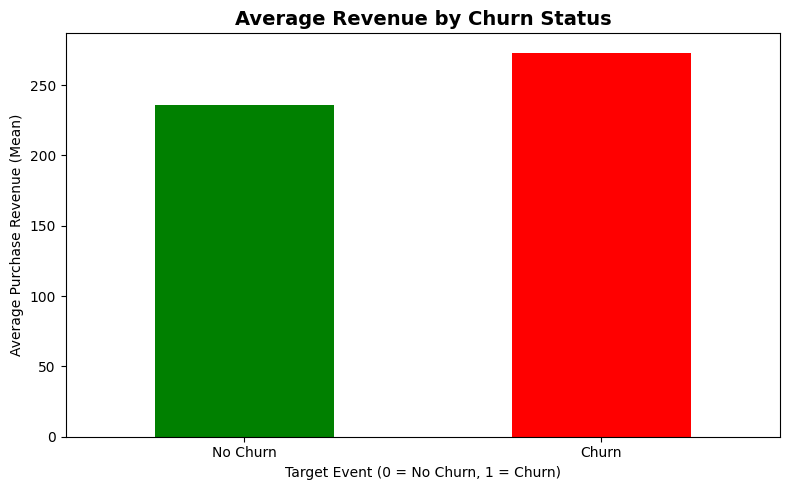

In [20]:
# Cell — Average revenue by churn status
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 5))
revenue_by_churn = df.groupby('target_event')['purchase_revenue_mean'].mean()
revenue_by_churn.plot(kind='bar', color=['green', 'red'], ax=ax)
ax.set_title('Average Revenue by Churn Status', fontsize=14, fontweight='bold')
ax.set_xlabel('Target Event (0 = No Churn, 1 = Churn)')
ax.set_ylabel('Average Purchase Revenue (Mean)')
ax.set_xticklabels(['No Churn', 'Churn'], rotation=0)
plt.tight_layout()
plt.savefig(OUT_FIG / "avg_revenue_by_churn.png", dpi=150)
plt.show()


It's strange that the mean of average spendings of churners are higher than no churn, there might be a case when the data is highly skewed where a few whales pull the mean higher, so a better way is to compare there medians

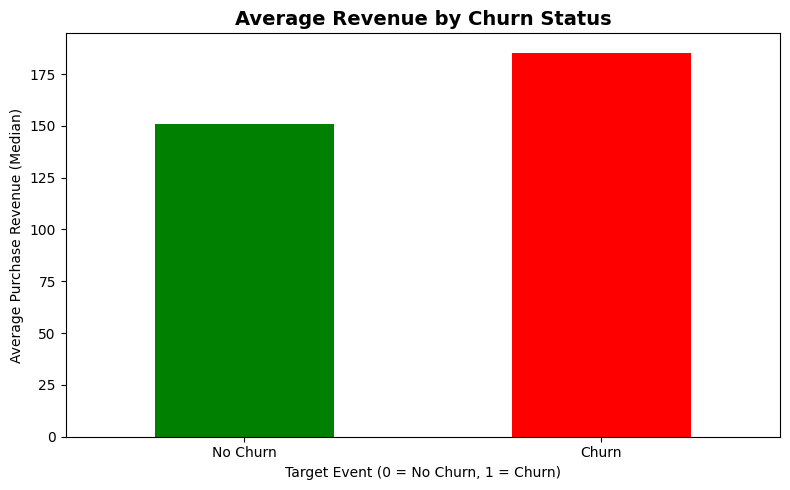

In [21]:
fig, ax = plt.subplots(figsize=(8, 5))
revenue_by_churn = df.groupby('target_event')['purchase_revenue_mean'].median()
revenue_by_churn.plot(kind='bar', color=['green', 'red'], ax=ax)
ax.set_title('Average Revenue by Churn Status', fontsize=14, fontweight='bold')
ax.set_xlabel('Target Event (0 = No Churn, 1 = Churn)')
ax.set_ylabel('Average Purchase Revenue (Median)')
ax.set_xticklabels(['No Churn', 'Churn'], rotation=0)
plt.tight_layout()
plt.savefig(OUT_FIG / "median_revenue_by_churn.png", dpi=150)
plt.show()


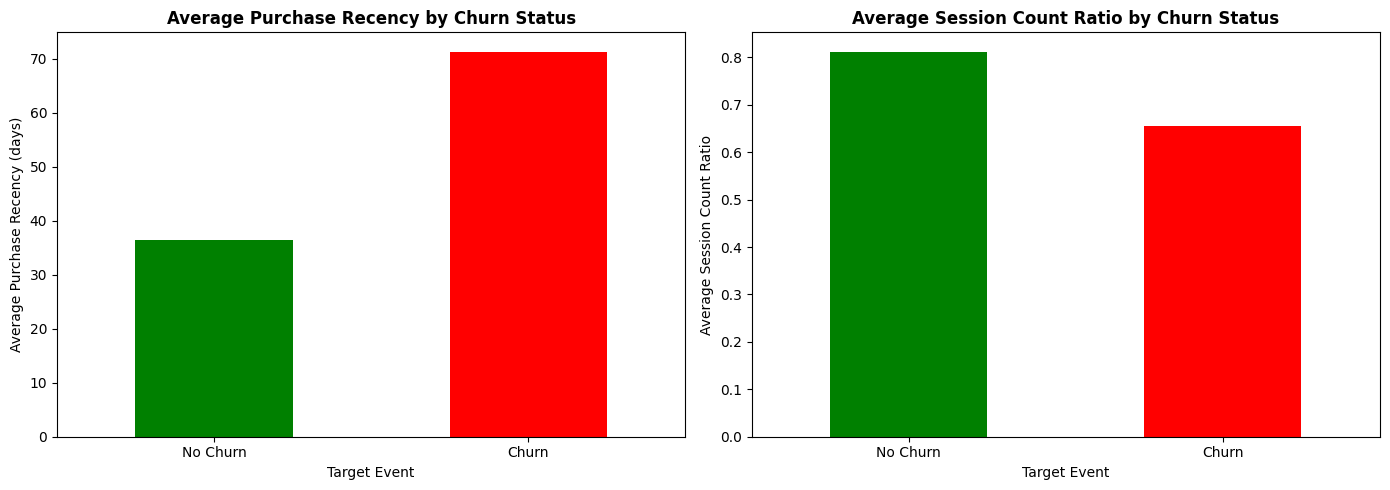

In [22]:
# Cell — Average recency/frequency by churn status
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Purchase recency
recency_by_churn = df.groupby('target_event')['purchase_recency_mean'].mean()
recency_by_churn.plot(kind='bar', color=['green', 'red'], ax=axes[0])
axes[0].set_title('Average Purchase Recency by Churn Status', fontweight='bold')
axes[0].set_xlabel('Target Event')
axes[0].set_ylabel('Average Purchase Recency (days)')
axes[0].set_xticklabels(['No Churn', 'Churn'], rotation=0)

# Session count ratio
session_by_churn = df.groupby('target_event')['session_count_ratio'].mean()
session_by_churn.plot(kind='bar', color=['green', 'red'], ax=axes[1])
axes[1].set_title('Average Session Count Ratio by Churn Status', fontweight='bold')
axes[1].set_xlabel('Target Event')
axes[1].set_ylabel('Average Session Count Ratio')
axes[1].set_xticklabels(['No Churn', 'Churn'], rotation=0)

plt.tight_layout()
plt.savefig(OUT_FIG / "avg_recency_frequency_by_churn.png", dpi=150)
plt.show()


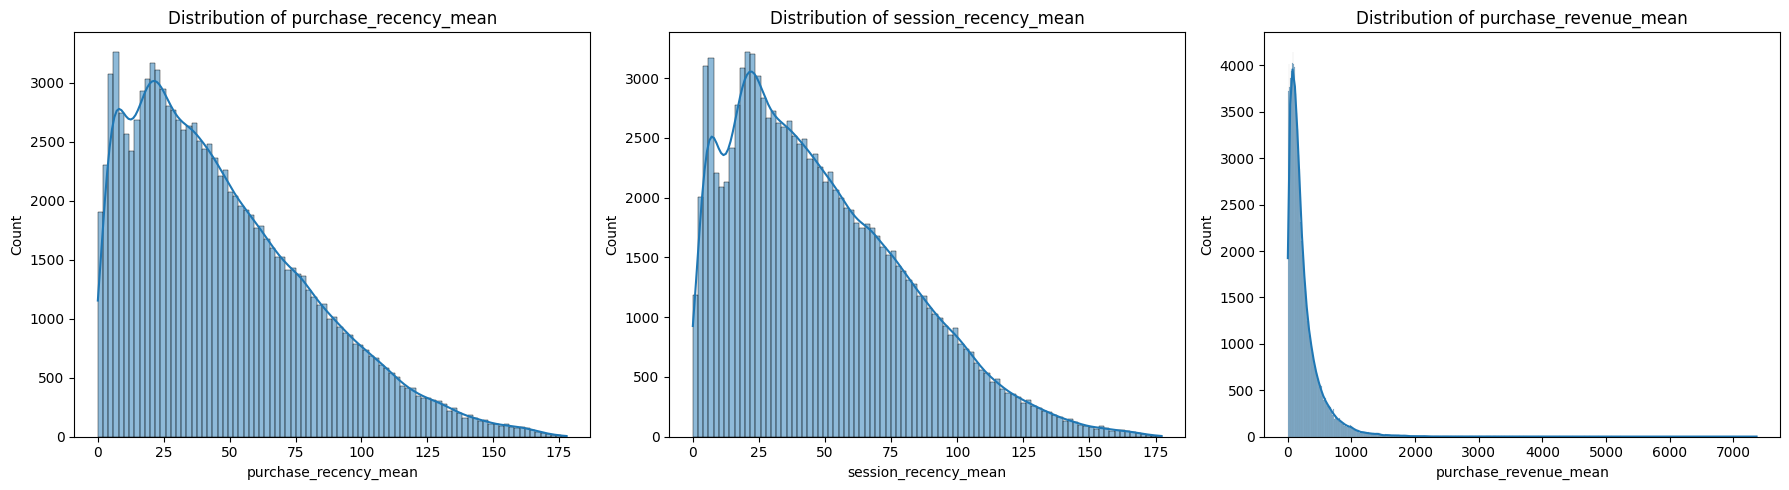

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = [
    "purchase_recency_mean",
    "session_recency_mean",
    "purchase_revenue_mean"
]

plt.figure(figsize=(18, 5))

for i, col in enumerate(cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

### Insights : 

1. **Recency Behaviour**

The average purchase recency for churned customers is almost twice as high as for non-churned users (~70 days vs ~35 days).
This means churned users take much longer to return, confirming that inactivity duration is a strong signal of churn.

2. **Session Frequency**

Churned users have a lower average session count ratio (~0.65) compared to retained users (~0.8).
This shows that retained customers engage more frequently and consistently with the platform, while churned users visit sporadically before leaving.

3. **Behavioural Distributions**

Both purchase_recency_mean and session_recency_mean display right-skewed distributions, meaning most customers have short inactivity periods while a few go dormant for long stretches.

purchase_revenue_mean is heavily right-skewed, where a small number of customers spend significantly more than the rest.

 - Interpretation:
This pattern reflects a long-tail e-commerce structure, where a small elite group of loyal customers generates most of the revenue, while the majority contribute minimally.

 4. **Revenue Paradox**

The average purchase revenue of churned customers is higher than that of non-churners.
This suggests that many churners were previously high-value customers who made substantial purchases before becoming inactive.
It reveals that churn does not only occur among low-value users, and losing such high spenders can heavily impact profitability.

💡 Business Implication:
Predicting churn early is essential to retain these high-revenue customers before disengagement occurs.

5. **Overall Behavioural Pattern**

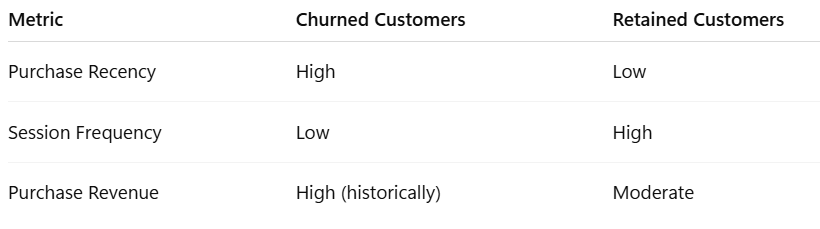

Summary:
Churned customers exhibit higher recency, lower engagement frequency, and historically higher revenue, suggesting that many were once loyal but later disengaged.
These findings validate that behavioural metrics (recency, frequency, and monetary value) are the most powerful predictors for churn classification models.

# Develop a model evaluation 


In [24]:
%pip install scikit-learn
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [40]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

import matplotlib.pyplot as plt





### 1.Define target and clean feature matrix

In [41]:
# Target
y = df["target_event"].astype(int)

# Drop leakage columns: anything starting with 'target_' + IDs
leak_cols = [c for c in df.columns if c.startswith("target_")]
id_cols   = [c for c in ["row_id", "user_id", "time_step"] if c in df.columns]

drop_cols = list(set(leak_cols + id_cols))

X = df.drop(columns=drop_cols)

# Keep numeric only
X = X.select_dtypes(include=[np.number])

# Remove constant features
X = X.loc[:, X.nunique() > 1]

print("Final feature shape:", X.shape)


Final feature shape: (112610, 265)


### 2. Step 2 – Train / test split (holdout set)/

In [42]:
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print(f"Training set size: {X_tr.shape}")
print(f"Test set size:     {X_te.shape}")


Training set size: (90088, 265)
Test set size:     (22522, 265)


### 3. Define pipelines

In [43]:
# Decision Tree pipeline
dt = ImbPipeline(steps=[
    ("smote", SMOTE(random_state=42)),
    ("select", SelectKBest(mutual_info_classif, k=80)),
    ("clf", DecisionTreeClassifier(random_state=42, max_depth=None, min_samples_leaf=5))
])

# Naive Bayes pipeline
nb = ImbPipeline(steps=[
    ("smote", SMOTE(random_state=42)),
    ("select", SelectKBest(mutual_info_classif, k=80)),
    ("scaler", StandardScaler(with_mean=True, with_std=True)),
    ("clf", GaussianNB())
])


### Step 4: Holdout evaluation function + results


In [44]:
def eval_model(pipe, Xtr, ytr, Xte, yte, name):
    pipe.fit(Xtr, ytr)
    pred = pipe.predict(Xte)
    prob = pipe.predict_proba(Xte)[:, 1] if hasattr(pipe, "predict_proba") else None

    metrics = {
        "model": name,
        "accuracy": accuracy_score(yte, pred),
        "precision": precision_score(yte, pred, zero_division=0),
        "recall": recall_score(yte, pred, zero_division=0),
        "f1": f1_score(yte, pred, zero_division=0),
    }
    if prob is not None:
        metrics["roc_auc"] = roc_auc_score(yte, prob)

    cm = confusion_matrix(yte, pred)
    print(f"\n{name} — Confusion Matrix:\n{cm}")
    print(f"\n{name} — Classification Report:\n{classification_report(yte, pred, zero_division=0)}")

    return metrics

m_dt = eval_model(dt, X_tr, y_tr, X_te, y_te, "DecisionTree")
m_nb = eval_model(nb, X_tr, y_tr, X_te, y_te, "NaiveBayes")

results_holdout = pd.DataFrame([m_dt, m_nb]).set_index("model")
results_holdout



DecisionTree — Confusion Matrix:
[[12726  2570]
 [ 2130  5096]]

DecisionTree — Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84     15296
           1       0.66      0.71      0.68      7226

    accuracy                           0.79     22522
   macro avg       0.76      0.77      0.76     22522
weighted avg       0.80      0.79      0.79     22522


NaiveBayes — Confusion Matrix:
[[7549 7747]
 [ 915 6311]]

NaiveBayes — Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.49      0.64     15296
           1       0.45      0.87      0.59      7226

    accuracy                           0.62     22522
   macro avg       0.67      0.68      0.61     22522
weighted avg       0.75      0.62      0.62     22522



,accuracy,precision,recall,f1,roc_auc
model,,,,,
DecisionTree,0.791315,0.664753,0.705231,0.684394,0.808972
NaiveBayes,0.615398,0.448926,0.873374,0.593028,0.818273


### Step 5: Cross-validation (stability check)

In [45]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ["accuracy", "precision", "recall", "f1", "roc_auc"]

def cross_val(pipe, name):
    scores = cross_validate(pipe, X, y, cv=cv, scoring=scoring, n_jobs=-1)
    out = {k.replace("test_", "") + "_mean": np.mean(v)
           for k, v in scores.items() if k.startswith("test_")}
    out["model"] = name
    return out

cv_dt = cross_val(dt, "DecisionTree")
cv_nb = cross_val(nb, "NaiveBayes")

results_cv = pd.DataFrame([cv_dt, cv_nb]).set_index("model")
results_cv


,accuracy_mean,precision_mean,recall_mean,f1_mean,roc_auc_mean
model,,,,,
DecisionTree,0.787310,0.659663,0.696457,0.67755,0.804290
NaiveBayes,0.610914,0.446384,0.871436,0.59008,0.818362


## CONCLUSION


 ### Model Evaluation & Comparison

This section evaluates the performance of two machine-learning models — Decision Tree and Naïve Bayes — trained on the REES46 e-commerce churn dataset. Both models were trained using a pipeline with SMOTE for class balancing and SelectKBest (Mutual Information) for feature selection (k=80).

Evaluation is based on two strategies:

A 20% holdout set (simulates real unseen customer data)

5-fold stratified cross-validation (tests stability across multiple splits)

The results below reflect the final, leakage-free modeling pipeline.

###  Holdout Evaluation (Real-World Performance)
Model	Accuracy	Precision	Recall	F1 Score	ROC-AUC
Decision Tree	0.791	0.665	0.705	0.684	0.809
Naïve Bayes	0.615	0.449	0.873	0.593	0.818
### Interpretation
#### Decision Tree

Offers the best overall balance across metrics.

Precision ~0.66 means fewer false alarms.

Recall ~0.70 indicates it correctly identifies ~70% of churners.

ROC-AUC ~0.81 confirms good ranking ability.

Produces interpretable rules → valuable for business stakeholders.

#### Naïve Bayes

Lower accuracy and precision — more false positives.

Very high recall (0.87) → excellent at catching churners.

Slightly higher ROC-AUC than DT (0.818 vs 0.809) → strong probability calibration.

Useful when the business prefers to prioritize catching more churners, even at the cost of more unnecessary retention offers.

### Cross-Validation (Stability Check)
Model	Accuracy	Precision	Recall	F1 Score	ROC-AUC
Decision Tree	0.787	0.660	0.696	0.678	0.804
Naïve Bayes	0.611	0.446	0.871	0.590	0.818
**Interpretation**

The cross-validation scores closely match the holdout scores, indicating:

Strong stability: neither model is overfitting.

Reliable generalization: expected performance on future customer data should be similar.

### Which Model Is Better?
**Decision Tree is Best All-Around Model
**
- Balanced accuracy, precision, recall, and F1

- Business-friendly interpretability

- Fewer false positives

- Robust under cross-validation

**Recommended as the primary churn-prediction model**.

**Naïve Bayes = High-Recall Backup Model
**
- Best for scenarios where the business wants to catch as many churners as possible

- Great ranking ability (highest ROC-AUC)

- But triggers more false alarms

**Useful in retention campaigns where messaging cost is low and missing churners is expensive
**
🧠 Final Insights

- Behavioral features (recency, frequency, monetary value) proved to be strong predictors — aligning with prior research.

- Both models performed realistically after leakage was removed, confirming modeling integrity.

- Decision Tree is the superior model for general use.

- Naïve Bayes offers a useful high-recall alternative when business wants aggressive churn capture.